<a href="https://colab.research.google.com/github/youtube-jocoding/pyupbit-autotrade/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pyupbit

In [15]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-XRP", interval="minute60")
df


,open,high,low,close,volume,value
2023-05-22 17:00:00,618.0,620.0,615.0,616.0,7.197517e+06,4.438450e+09
2023-05-22 18:00:00,617.0,619.0,615.0,617.0,4.018214e+06,2.479631e+09
2023-05-22 19:00:00,617.0,619.0,616.0,619.0,2.767014e+06,1.707849e+09
2023-05-22 20:00:00,619.0,619.0,616.0,619.0,3.022229e+06,1.867003e+09
2023-05-22 21:00:00,618.0,620.0,616.0,617.0,5.707801e+06,3.531004e+09
...,...,...,...,...,...,...
2023-05-30 20:00:00,669.0,671.0,668.0,670.0,3.688466e+06,2.468839e+09
2023-05-30 21:00:00,670.0,670.0,665.0,667.0,8.717956e+06,5.816280e+09
2023-05-30 22:00:00,667.0,669.0,666.0,666.0,4.883128e+06,3.258230e+09
2023-05-30 23:00:00,667.0,668.0,660.0,663.0,1.003961e+07,6.665962e+09


In [16]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-05-22 17:00:00,616.0
1,2023-05-22 18:00:00,617.0
2,2023-05-22 19:00:00,619.0
3,2023-05-22 20:00:00,619.0
4,2023-05-22 21:00:00,617.0
...,...,...
195,2023-05-30 20:00:00,670.0
196,2023-05-30 21:00:00,667.0
197,2023-05-30 22:00:00,666.0
198,2023-05-30 23:00:00,663.0


In [17]:
#prophet 불러옴
from fbprophet import Prophet

In [18]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [19]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

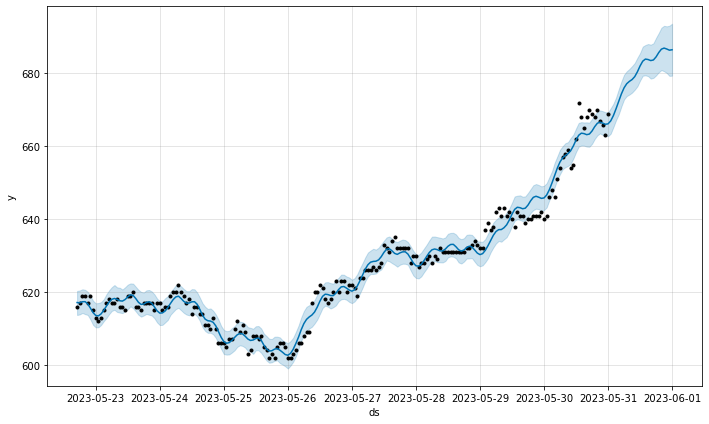

In [20]:
#그래프1
fig1 = model.plot(forecast)

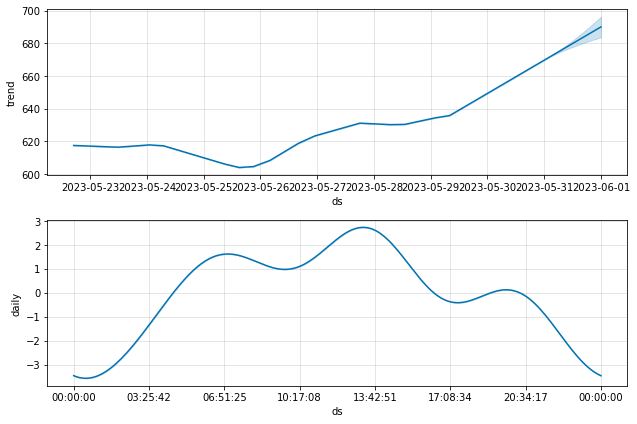

In [21]:
#그래프2
fig2 = model.plot_components(forecast)

In [24]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-XRP")
nowValue

670.0

In [26]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

678.3361151312423

In [27]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  670.0
종가의 가격:  678.3361151312423


In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-22 17:00:00,617.468184,613.707738,620.329905,617.468184,617.468184,-0.336980,-0.336980,-0.336980,-0.336980,-0.336980,-0.336980,0.0,0.0,0.0,617.131204
1,2023-05-22 18:00:00,617.407102,613.872913,620.447755,617.407102,617.407102,-0.340645,-0.340645,-0.340645,-0.340645,-0.340645,-0.340645,0.0,0.0,0.0,617.066457
2,2023-05-22 19:00:00,617.346020,614.279868,620.775694,617.346020,617.346020,0.003243,0.003243,0.003243,0.003243,0.003243,0.003243,0.0,0.0,0.0,617.349263
3,2023-05-22 20:00:00,617.284938,613.949365,620.625671,617.284938,617.284938,0.093706,0.093706,0.093706,0.093706,0.093706,0.093706,0.0,0.0,0.0,617.378643
4,2023-05-22 21:00:00,617.223856,613.720228,620.082072,617.223856,617.223856,-0.461530,-0.461530,-0.461530,-0.461530,-0.461530,-0.461530,0.0,0.0,0.0,616.762326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2023-05-31 20:00:00,686.591806,680.938290,692.567086,681.847029,691.133134,0.093706,0.093706,0.093706,0.093706,0.093706,0.093706,0.0,0.0,0.0,686.685511
220,2023-05-31 21:00:00,687.439161,680.618977,693.090355,682.327379,692.385450,-0.461530,-0.461530,-0.461530,-0.461530,-0.461530,-0.461530,0.0,0.0,0.0,686.977631
221,2023-05-31 22:00:00,688.286516,680.140136,692.944333,682.676413,693.660441,-1.564713,-1.564713,-1.564713,-1.564713,-1.564713,-1.564713,0.0,0.0,0.0,686.721802
222,2023-05-31 23:00:00,689.133871,679.341247,693.114848,683.240450,694.877551,-2.735698,-2.735698,-2.735698,-2.735698,-2.735698,-2.735698,0.0,0.0,0.0,686.398173
